In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
path = r'C:\Users\kamal\OneDrive\Desktop\Practice\master.csv'

In [3]:
suicide = pd.read_csv(path)

In [4]:
suicide.head(5)

,country,year,sex,age,suicides_no,population,suicides_hk,country-year,HDI_year,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
suicide.describe()

,year,suicides_no,population,suicides_hk,HDI_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
suicide.dtypes

country            object
year                int64
sex                object
age                object
suicides_no         int64
population          int64
suicides_hk       float64
country-year       object
HDI_year          float64
gdp_year           object
gdp_per_capita      int64
generation         object
dtype: object

In [55]:
suicide.year = suicide.year.astype(int)


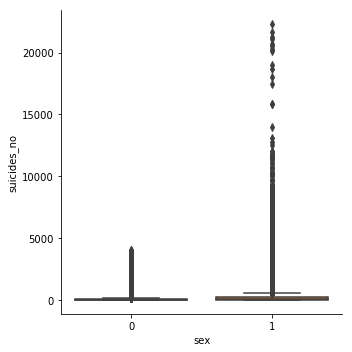

In [57]:
sns.catplot(x='sex', y='suicides_no', data=suicide, kind='box')

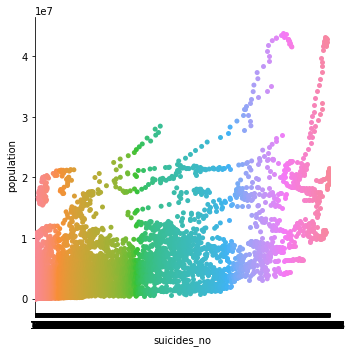

In [59]:
sns.catplot(x='suicides_no', y='population', data =suicide)

In [8]:
suicide.dtypes

country            object
year                int32
sex                object
age                object
suicides_no         int64
population          int64
suicides_hk       float64
country-year       object
HDI_year          float64
gdp_year           object
gdp_per_capita      int64
generation         object
dtype: object

In [9]:
suicide.suicides_no = suicide.suicides_no.astype(int)
suicide.population = suicide.population.astype(int)
suicide.suicides_hk = suicide.suicides_hk.astype(float)
suicide.gdp_per_capita = suicide.gdp_per_capita.astype(int)
suicide.age = suicide.age.str.split('-',1)
suicide.age = suicide.age.str.get(0)

In [10]:
suicide.age = suicide.age.str.split('+',1)

In [37]:
suicide.age = suicide.age.str.get(0)
suicide.age.head(5)

0    1
1    3
2    1
3    7
4    2
Name: age, dtype: object

In [12]:
suicide.sex = suicide.sex.map({'male':1,'female':0})

In [13]:
suicide_features = suicide[suicide.columns[0:9]]

In [14]:
suicide_features.head(5)

,country,year,sex,age,suicides_no,population,suicides_hk,country-year,HDI_year
0,Albania,1987,1,15,21,312900,6.71,Albania1987,NaN
1,Albania,1987,1,35,16,308000,5.19,Albania1987,NaN
2,Albania,1987,0,15,14,289700,4.83,Albania1987,NaN
3,Albania,1987,1,75,1,21800,4.59,Albania1987,NaN
4,Albania,1987,1,25,9,274300,3.28,Albania1987,NaN


In [15]:
suicide_features = suicide_features.drop(columns = ['HDI_year','country-year','country'])

In [45]:
suicide_target = suicide[suicide.columns[-1]]

In [29]:
suicide_target = pd.DataFrame(data = suicide_target, columns = ['generation'])
suicide_target.head(5)

,generation
0,Generation X
1,Silent
2,Generation X
3,G.I. Generation
4,Boomers


In [46]:
X_train, X_test, y_train, y_test = train_test_split(suicide_features, suicide_target, test_size = 0.2, random_state = 42 )

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
dtc= GradientBoostingClassifier(min_samples_split = 4)

In [49]:
dtc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [50]:
pred = dtc.predict(X_test)

In [51]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

1.0


In [52]:
metrics.confusion_matrix(y_test,pred)

array([[ 967,    0,    0,    0,    0,    0],
       [   0,  573,    0,    0,    0,    0],
       [   0,    0, 1322,    0,    0,    0],
       [   0,    0,    0,  303,    0,    0],
       [   0,    0,    0,    0, 1144,    0],
       [   0,    0,    0,    0,    0, 1255]], dtype=int64)